In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import welch
from scipy.optimize import fsolve

In [2]:
def sigm(x):
    v0 = 6         
    vmax = 2.5   
    r = 0.56   
    return (2*vmax)/(1+np.exp(r*(v0-x)))

def differentiate_sigmoid(x, vmax, v0,  r):
  ds_dx = (r*2*vmax*(np.exp(r*(v0-x)))) / (1+np.exp(r*(v0-x)))**2
  return ds_dx

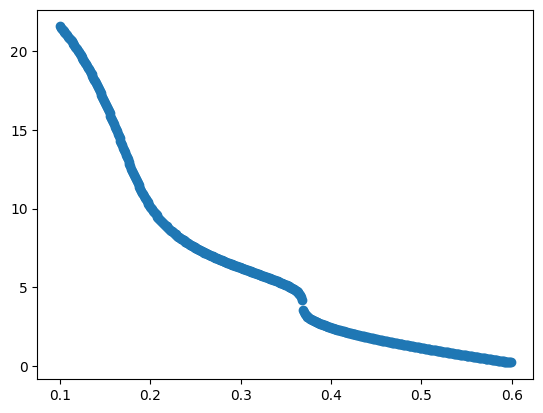

In [3]:
A = 3.25
B = 22
C = 135
c1 = 1*C
c2 = 0.8*C  
v0 = 6        
a = 100      
b = 50       
vmax = 2.5 
r = 0.56       
divA = (A/a)
divB = (B/b)
C3_all = np.arange(0.1,0.6,0.001)
c3 = C3_all*C
C4_all = np.arange(0.1,0.6,0.001)
c4 = C4_all*C
y = np.random.rand(len(C3_all))
p = 220 # p=150 for the lower external input fixed point schematic
index_values = []
for i in range(len(C3_all)):
  x = np.arange(-4,100,0.0001)
  y1 = x
  y2 = (divA*p) + (divA*c2*sigm(divA*c1*sigm(x))) - (divB*c4[i]*sigm(divA*c3[i]*sigm(x)))
  idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()
  index_values.append(idx)

new_values = []
for i in range(0,len(index_values)):
  new_values.append(y1[index_values[i]])

w = [[C3_all[i]] * len(new_values[i]) for i in range(len(new_values))]

x_to_plot = [item for sublist in w for item in sublist]
y_to_plot = [item for sublist in new_values for item in sublist]
plt.scatter(x_to_plot, y_to_plot)

In [4]:
un = 0
stability_connection = []
for j in range(0,len(new_values)):
    for me in range(0,len(new_values[j])):
      J = np.zeros((6, 6))
      fix_point = new_values[j][me]
      first_coordinate = (A/a)*sigm(fix_point)
      J[0, 3] = 1
      J[1, 4] = 1
      J[2, 5] = 1
      J[3, 0] = -a**2
      J[3,1] = A*a*differentiate_sigmoid(fix_point,vmax,v0,r)
      J[3,2] = -A*a*differentiate_sigmoid(fix_point,vmax,v0,r)
      J[3,3] = -2*a
      J[4, 0] = (A*a*c2*c1)*differentiate_sigmoid(c1*first_coordinate,vmax,v0,r)
      J[4, 1] = -a**2
      #J[4, 3] = -2*a
      J[4, 4] = -2*a
      J[5, 0] = (b*B*c4[j]*c3[j])*differentiate_sigmoid(c3[j]*first_coordinate,vmax,v0,r)
      J[5, 2] = -b**2
      J[5, 5] = -2*b
      evals = np.linalg.eigvals(J)
      evals
      stability_per = np.zeros(len(evals))
      for i in range(0,len(evals)):
        real_part = np.real(evals[i])
        if real_part > 0:
          un = 1
          stability_per[i] =un
        else:
          un = 0
          stability_per[i] = un
      value = np.zeros(len(new_values[j]))
      if stability_per.any()==1:
        value = 1
      else:
        value = 0
      stability_connection.append(value)

In [8]:
w = [[C3_all[i]] * len(new_values[i]) for i in range(len(new_values))]
index_unstable = np.where(np.array(stability_connection)==1)

x_to_plot_prev = [item for sublist in w for item in sublist]
y_to_plot = [item for sublist in new_values for item in sublist]
x_to_plot = [i * 135 for i in x_to_plot_prev] 
x_array = np.array(x_to_plot)
y_array = np.array(y_to_plot)

In [36]:
val = [0.15*135, 0.2*135, 0.25*135,0.35*135, 0.5*135]
pos = []
for i in val:
    pos.append(np.where(np.round(x_array,3)==i)[0][0])

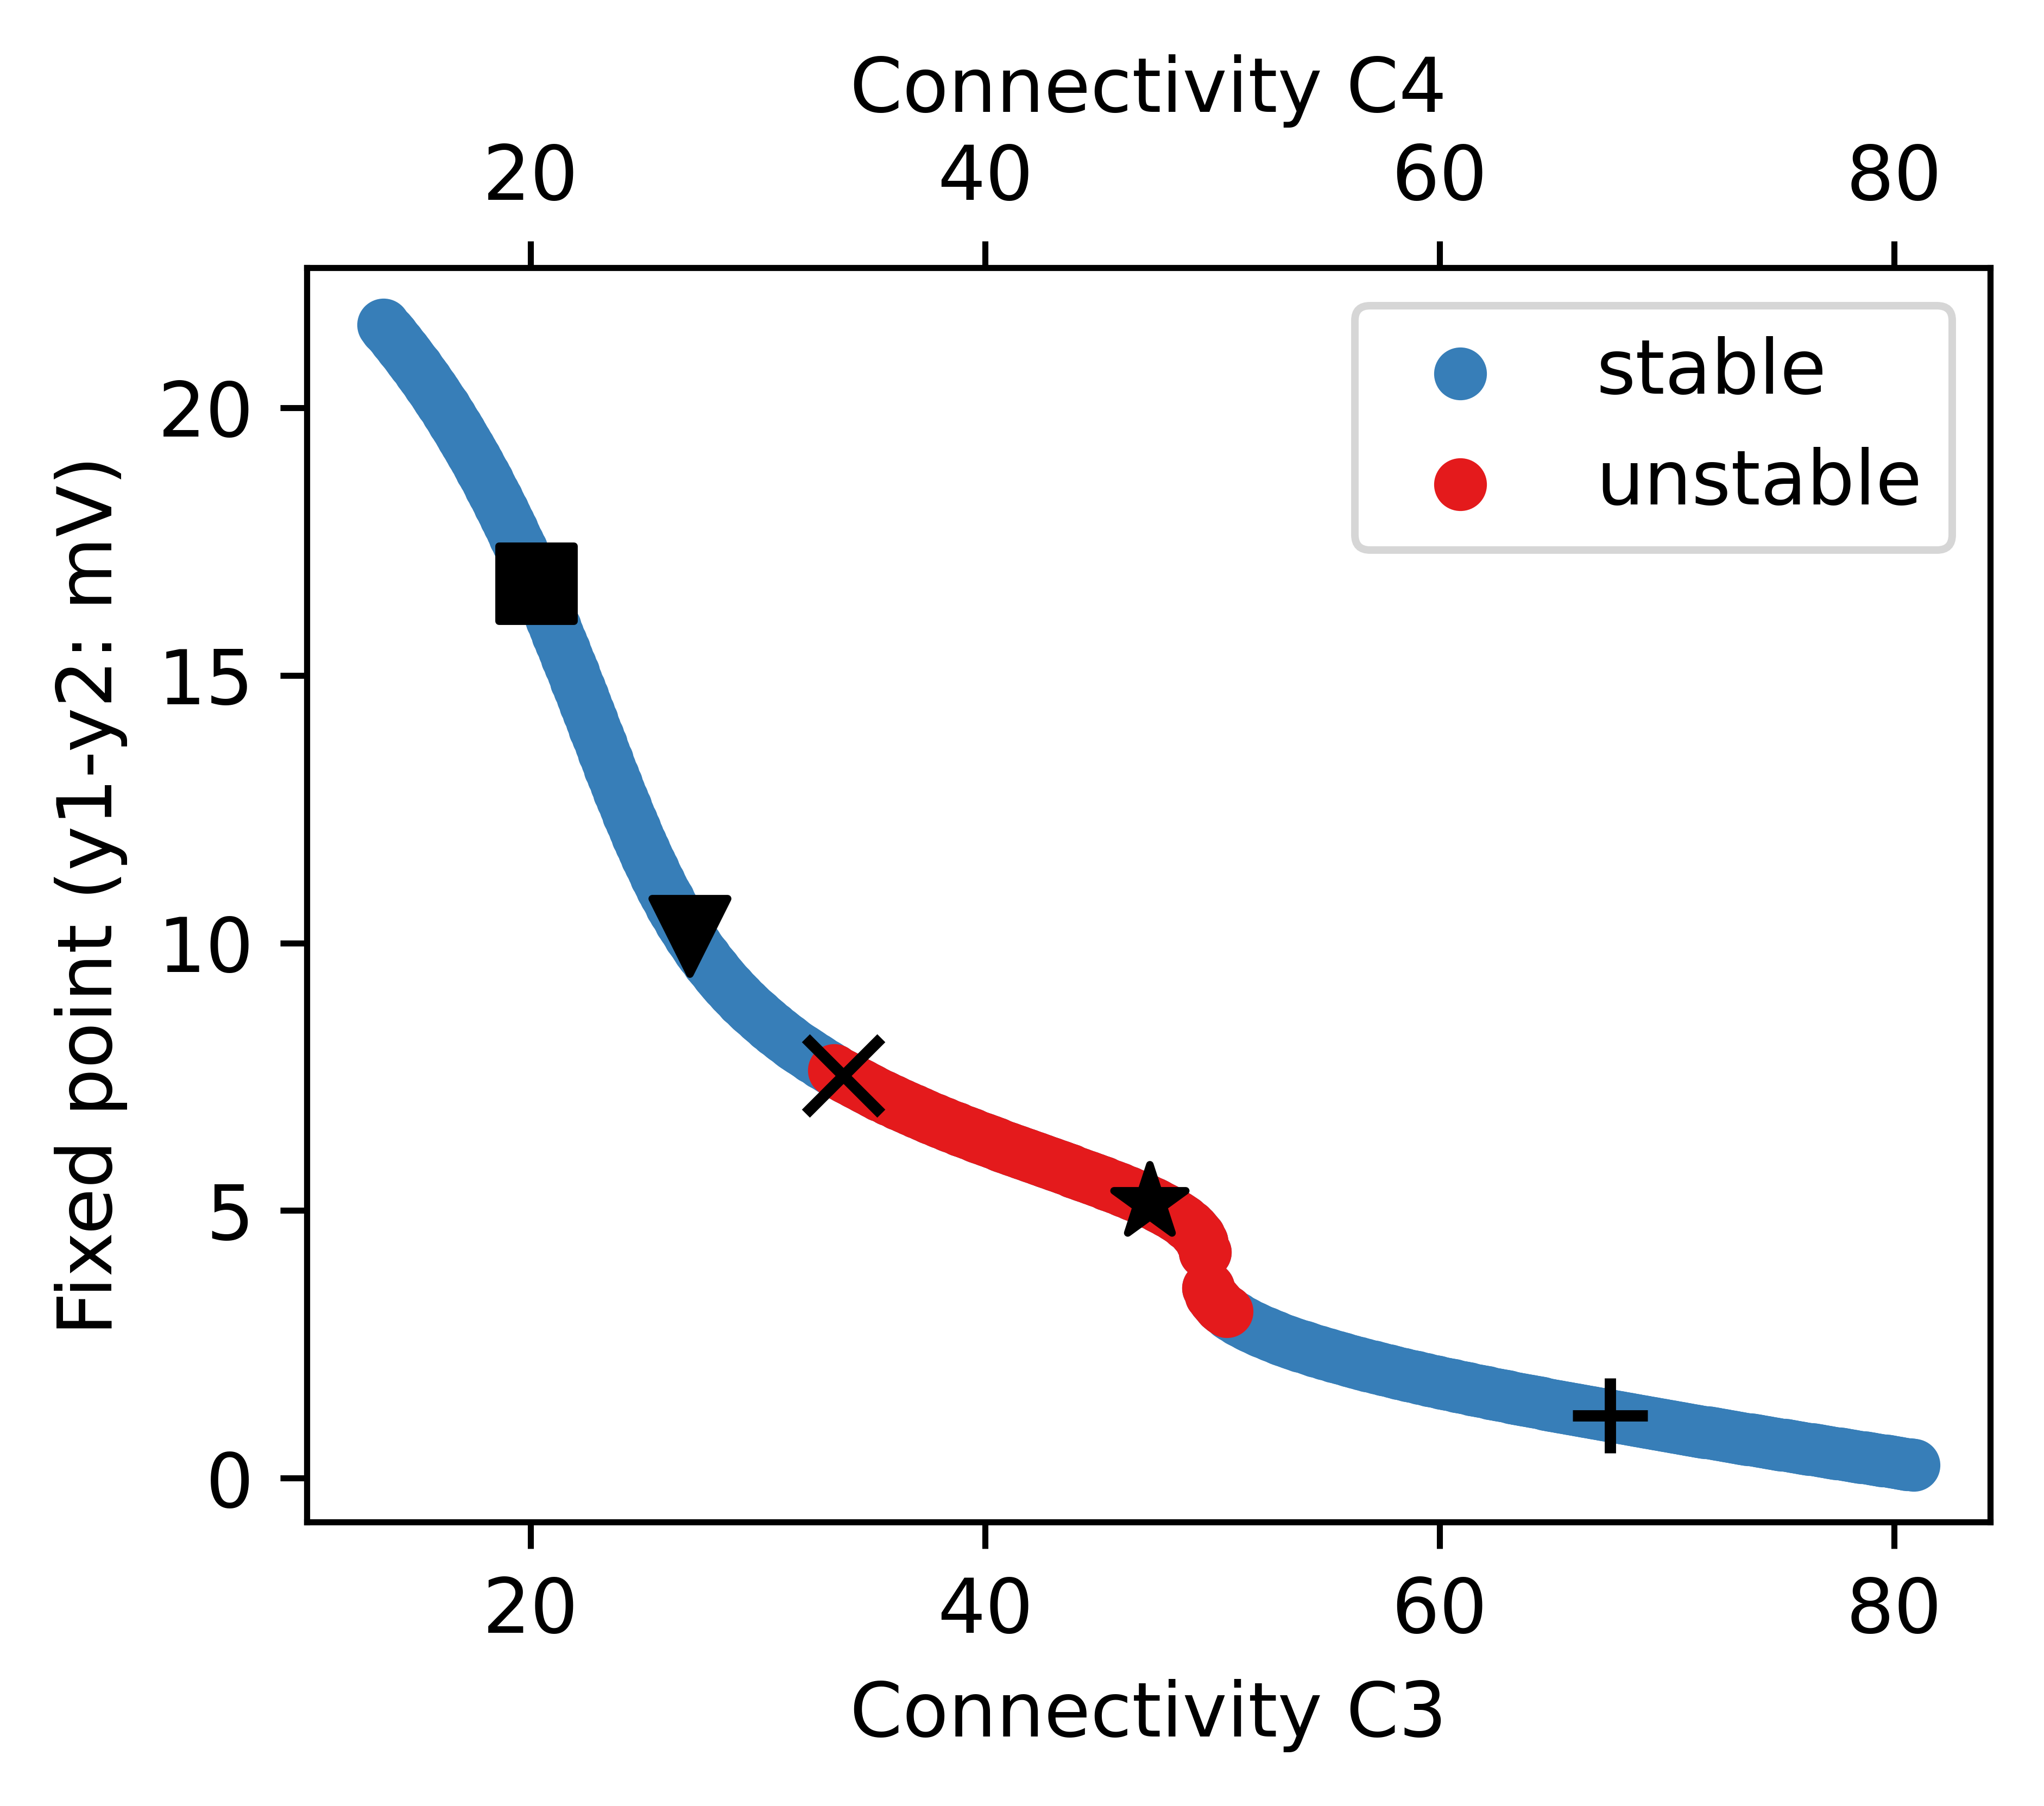

In [53]:
fig,ax1=plt.subplots(figsize=(4, 3), dpi =1000)
ax1.scatter(x_to_plot, y_to_plot, color=plt.cm.Set1(1), label='stable')
ax1.scatter(x_array[index_unstable], y_array[index_unstable], color = plt.cm.Set1(0),label='unstable')
ax2=plt.twiny(ax1)
ax2.scatter(x_to_plot, y_to_plot, color=plt.cm.Set1(1), alpha=0)
ax2.set_xlabel('Connectivity C4')
markers = ["s", "v", "x", "*", "+"]
x = val
y = y_array[pos]
for xp, yp, m in zip(x, y, markers):
   ax1.scatter(xp, yp, marker=m, color="black",s=100)
#plt.scatter([0.15, 0.2, 0.25,0.35, 0.5], y_array[res],marker="x",color = "black", s= 100)
ax1.set_ylabel("Fixed point (y1-y2: mV)")
ax1.set_xlabel("Connectivity C3")
ax1.legend()